In [12]:
import numpy as np
import matplotlib.pyplot as plt
from evalf import evalf
from trapezoidalMatrixFree import trapezoidalMatrixFree
from trapezoidal import rk_integrator

%load_ext autoreload
%autoreload 2

def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
        
        
def plot_results(x, L_list, tlist):
    n_t = x[:,2:]
    plt.pcolormesh(tlist, L_list, n_t.T, shading='nearest')
    # plt.contourf(tlist, L_list, n_t.T)
    plt.ylabel('L (particle size)')
    plt.xlabel('time')
    plt.colorbar()
    plt.show()

    plt.plot(tlist, x[:,0]) 
    plt.title('supersaturation')
    plt.xlabel('t')
    plt.show()

    plt.plot(tlist, x[:,1]) 
    plt.title('volume')
    plt.xlabel('t')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
L_list = np.linspace(0,0.01, 100)  # uniform dL assumed below
tlist = np.linspace(0,30,100)


S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution
x0 = np.hstack([S0, V0, n0])

# target parameters we will try to recover
p = {
    'L_list' : L_list,
    'E' :  1e-6, #evaporation rate
    'rho' : 1200, # density of the crystal
    'k_v' : 1, #goes in N_C, volumetric shape factor
    'k_g' : 1e-3, #growth rate constant m/s
    'g' : 1, #power constant for growth
    'k_N' : 1e5, #nucleation rate constant 
    'alpha' :2, #power constant for nucleation
    'weno': False  # use weno or not for differentiation w.r.t. L
     }


T = tlist[-1]
# deltat = tlist[1] - tlist[0]

# alpha determines adaptive timestep scaling
# increasing alpha[0] will decrease sensitivity to small valued components of the statevector
# alpha[1] is an overal multiplier to the step size
# alpha[2] is a maximum step size
alpha = [1e-1, 5e-1, 2] 

x_t, tlist=trapezoidalMatrixFree(evalf,x0, alpha, tlist[0], T, p, errf=1e-3, errDeltax=1e-3, relDeltax=1e-3, MaxIter=40,tolrGCR=1e-2,epsMF=1e-6)
x_t = np.array(x_t)

t: 5e-07
t: 1.2499944312902224e-06
t: 2.37497354890248e-06
t: 4.062414035268392e-06
t: 6.593511340319003e-06
t: 1.0390014603302168e-05
t: 1.608444847047111e-05
t: 2.4625377079666688e-05
t: 3.743514546691714e-05
t: 5.664614422745554e-05
t: 8.545442587388341e-05
t: 0.0001286483767435453
t: 0.00019340470629432033
t: 0.00029046148122292587
t: 0.0004358721897976221
t: 0.000653597125034429
t: 0.0009699586269363527
t: 0.001314871020525405
t: 0.0017183096365945246
t: 0.002203886396691686
t: 0.002796787075414527
t: 0.003526422678655326
t: 0.004428216623368753
t: 0.005545306393930607
t: 0.006930572344534889
t: 0.008648448303970567
t: 0.01060477145844213
t: 0.012704816887854874
t: 0.015040343673853625
t: 0.017684152371645955
t: 0.0207056634238044
t: 0.024176934608693048
t: 0.028175825068964717
t: 0.032669226099273405
t: 0.03734076984533262
t: 0.042358509760695204
t: 0.0478388963251278
t: 0.05387966415558085
t: 0.060572313035049154
t: 0.06781239712230726
t: 0.07528181221907636
t: 0.083187566784849

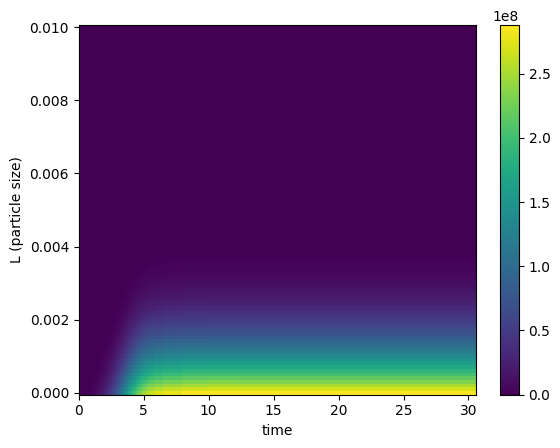

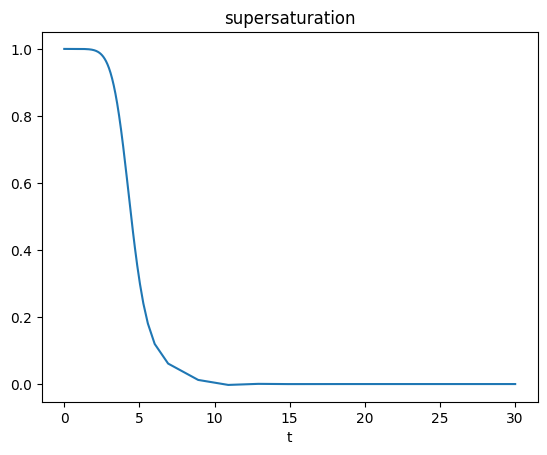

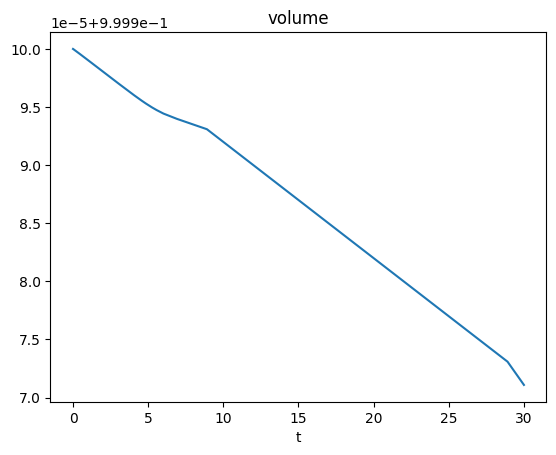

In [150]:
plot_results(x_t, L_list, tlist)

  0%|          | 0/100 [00:00<?, ?it/s]

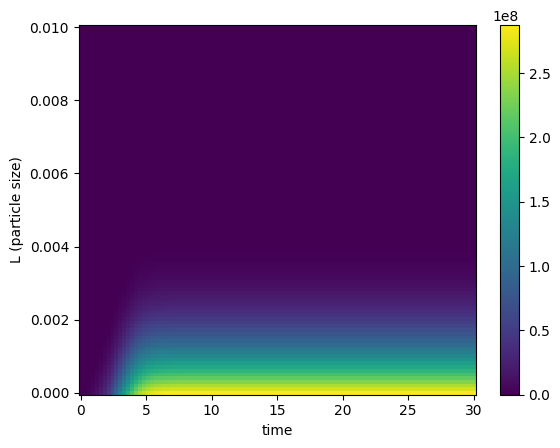

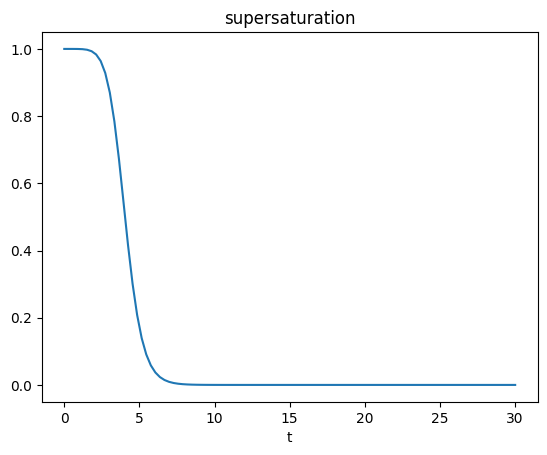

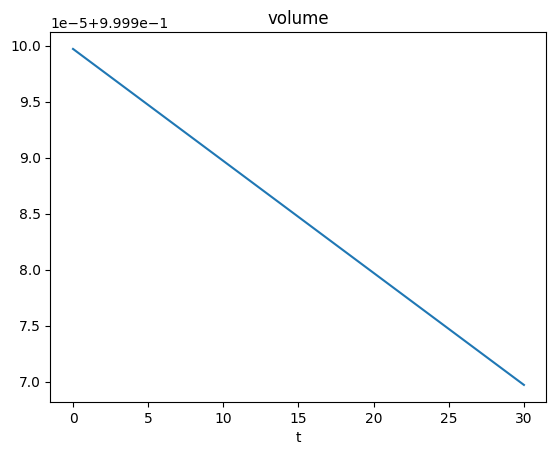

In [61]:
#compare with rk4
tlist = np.linspace(0,30,100)

x_t = rk_integrator(x0, tlist, p)
plot_results(x_t, L_list, tlist)